In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Cell 1: Load and Inspect the New Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset from the file path
# Make sure the file 'air pollution dataset.csv' is in the right folder
file_path = 'air pollution dataset.csv'
df_new = pd.read_csv(file_path)

print("New dataset loaded successfully.")
print("\nDataset Info:")
df_new.info()

print("\nFirst 5 rows:")
df_new.head()

New dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23463 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
 12  newCountry          23463 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.3+ MB

First 5 rows:


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,newCountry
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,Russian Federation
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,Brazil
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,Italy
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,Poland
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,France


In [7]:
# Cell 2: Data Cleaning and Preparation

# Let's check for any missing values
print("Missing values per column:")
print(df_new.isnull().sum())

# It looks like the data is clean, which is great!

# The column names have spaces, which can be tricky. Let's replace spaces with underscores.
df_new.columns = df_new.columns.str.replace(' ', '_')

print("\nCleaned column names:")
print(df_new.columns)

Missing values per column:
Country               427
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
newCountry              0
dtype: int64

Cleaned column names:
Index(['Country', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value',
       'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category',
       'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value',
       'PM2.5_AQI_Category', 'newCountry'],
      dtype='object')


In [8]:
# Cell 3: Feature and Target Selection

# Our features (X) will be the numerical AQI values for each pollutant.
features = ['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
X = df_new[features]

# Our target (y) is the overall AQI Category.
y = df_new['AQI_Category']

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   AQI_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  PM2.5_AQI_Value
0         51             1               36              0               51
1         41             1                5              1               41
2         66             1               39              2               66
3         34             1               34              0               20
4         22             0               22              0                6

Target (y):
0    Moderate
1        Good
2    Moderate
3        Good
4        Good
Name: AQI_Category, dtype: object


In [9]:
# Cell 4: Split Data into Training and Testing Sets

# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' ensures the proportion of categories is the same in train and test sets.

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (18770, 5)
Testing set shape: (4693, 5)


In [10]:
# Cell 5: Build and Train a Random Forest Classifier

# Create an instance of the Random Forest Classifier
# n_estimators=100 means it will build 100 decision trees.
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on our training data
print("Training the Random Forest model...")
model_rf.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


Model Accuracy: 100.00%

Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1987
                     Hazardous       1.00      1.00      1.00        38
                      Moderate       1.00      1.00      1.00      1846
                     Unhealthy       1.00      1.00      1.00       446
Unhealthy for Sensitive Groups       1.00      1.00      1.00       318
                Very Unhealthy       1.00      1.00      1.00        58

                      accuracy                           1.00      4693
                     macro avg       1.00      1.00      1.00      4693
                  weighted avg       1.00      1.00      1.00      4693


Confusion Matrix:


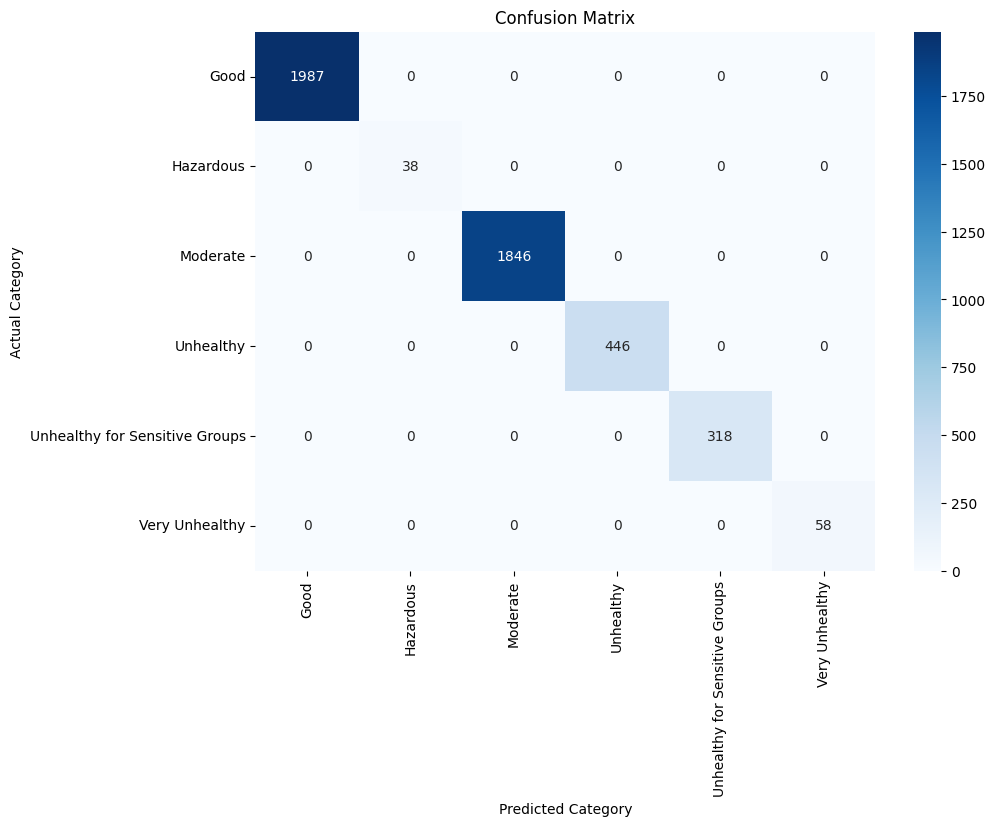

In [11]:
# Cell 6: Evaluate the Model

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 2. Print a detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Visualize the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# Get the class labels in the correct order
class_labels = model_rf.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

Feature Importances:
           feature  importance
0        AQI_Value    0.523843
4  PM2.5_AQI_Value    0.401383
1     CO_AQI_Value    0.038681
2  Ozone_AQI_Value    0.034467
3    NO2_AQI_Value    0.001626


C:\Users\Purvanshu\AppData\Local\Temp\ipykernel_17080\774476869.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


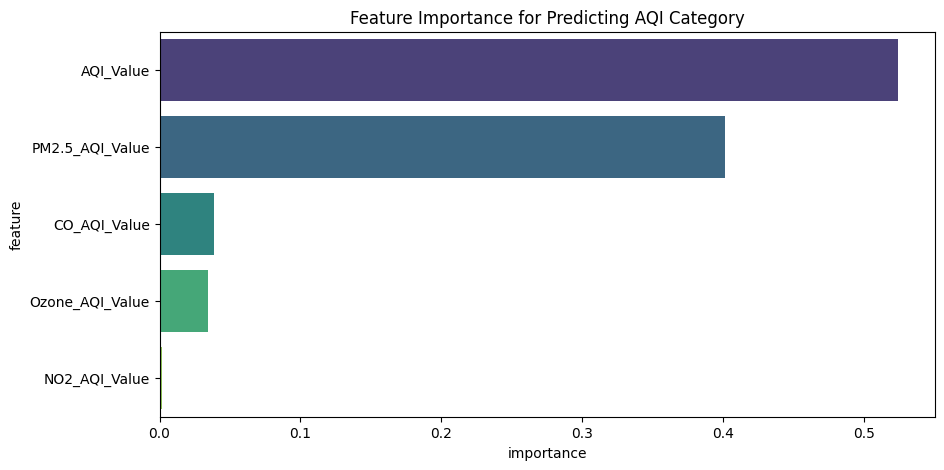

In [12]:
# Cell 7: Feature Importance

# Get feature importances from the trained model
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting AQI Category')
plt.show()

In [13]:
# Cell 8: Make a Prediction on New, Hypothetical Data

# Create a new DataFrame with some hypothetical pollutant values
# This represents a scenario with high Ozone and PM2.5
hypothetical_data = pd.DataFrame({
    'AQI_Value': [155],
    'CO_AQI_Value': [5],
    'Ozone_AQI_Value': [155],
    'NO2_AQI_Value': [12],
    'PM2.5_AQI_Value': [140]
})

# Reorder columns to match the training data order
hypothetical_data = hypothetical_data[features]

# Use our trained model to predict the AQI category
predicted_category = model_rf.predict(hypothetical_data)

print("--- Hypothetical Scenario ---")
print("Pollutant Values:")
print(hypothetical_data)
print(f"\nPredicted AQI Category: '{predicted_category[0]}'")

--- Hypothetical Scenario ---
Pollutant Values:
   AQI_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  PM2.5_AQI_Value
0        155             5              155             12              140

Predicted AQI Category: 'Unhealthy'


In [14]:
# Cell 9: Building a More Realistic Model (Without the main AQI_Value)

print("--- Building a new model without the 'AQI_Value' feature ---")

# Our new feature set excludes the main AQI_Value
new_features = ['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
X_new = df_new[new_features]
y_new = df_new['AQI_Category']

# Split the new data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

# Create and train a new Random Forest model
model_rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_new.fit(X_train_new, y_train_new)

# Evaluate the new model
y_pred_new = model_rf_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"\nNew Model Accuracy (without AQI_Value): {accuracy_new * 100:.2f}%")

# Check the new feature importances
importances_new = model_rf_new.feature_importances_
feature_importance_df_new = pd.DataFrame({'feature': new_features, 'importance': importances_new})
feature_importance_df_new = feature_importance_df_new.sort_values(by='importance', ascending=False)

print("\nNew Feature Importances:")
print(feature_importance_df_new)

--- Building a new model without the 'AQI_Value' feature ---

New Model Accuracy (without AQI_Value): 99.89%

New Feature Importances:
           feature  importance
3  PM2.5_AQI_Value    0.836251
1  Ozone_AQI_Value    0.081643
0     CO_AQI_Value    0.073411
2    NO2_AQI_Value    0.008696
